# COFFEE SALES DATASET

# INTRODUCTION TO DATASET
* This dataset contains coffee shop transaction records, including details about sales, payment type, time of purchase, and customer preferences.

## COLUMN DESCRIPTION

* **Hour_of_day** → Hour of purchase (0–23)

* **Cash_type** → Mode of payment (cash / card)

* **Money** → Transaction amount (in local currency)

* **Coffee_name**→ Type of coffee purchased (e.g., Latte, Americano, Hot Chocolate)

* **Time_of_Day** → Categorized time of purchase (Morning, Afternoon, Night)

* **Weekday** → Day of the week (e.g., Mon, Tue, …)

* **Month_name** → Month of purchase (e.g., Jan, Feb, Mar)

* **Weekdaysort** → Numeric representation for weekday ordering (1 = Mon, 7 = Sun)

* **Monthsort**→ Numeric representation for month ordering (1 = Jan, 12 = Dec)

* **Date** → Date of transaction (YYYY-MM-DD)

* **Time** → Exact time of transaction (HH:MM:SS)

**Import the required librarie**

In [2]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

**Load the dataset**

In [3]:
coffee=pd.read_csv('Coffe_sales.csv')

In [4]:
# Show the top 5 Rows
coffee.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [5]:
coffee.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [6]:
# Lets see the info of the data 
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [7]:
print('Rows:',coffee.shape[0])
print('Columns:',coffee.shape[1])

Rows: 3547
Columns: 11


**Infrence**
* So there are 3547 rows and 11 columns.Overall data is not to small and not to big.
* The data has 4 quantitative and 6 qualitative features.
* Info of a dataset also shows that there are features with no missing values.

In [8]:
# Remove Weekdaysort and Monthsort since its Redundant 
coffee.drop(columns=['Weekdaysort','Monthsort'],inplace=True)

In [9]:
coffee

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,2025-03-23,15:47:28.723000


# DESCRIPTIVE ANALYSIS

In [7]:
# Lets give the 5 point summary
coffee.describe().T

,count,mean,std,min,25%,50%,75%,max
hour_of_day,3547.0,14.185791,4.234010,6.00,10.00,14.00,18.00,22.0
money,3547.0,31.645216,4.877754,18.12,27.92,32.82,35.76,38.7
Weekdaysort,3547.0,3.845785,1.971501,1.00,2.00,4.00,6.00,7.0
Monthsort,3547.0,6.453905,3.500754,1.00,3.00,7.00,10.00,12.0


**Infrence**
* The employee works for minimum 6hrs and maximum for 22hrs a day in the coffee shop.
* The money column shows that the data has mean less than median hence the data is slighlty left skewed.
* Similarly the Weekdaysort and Monthsort data is slighlty left skewed.

In [8]:
# Lets look at the summary of object dtypes
coffee.describe(include=object).T

,count,unique,top,freq
cash_type,3547,1,card,3547
coffee_name,3547,8,Americano with Milk,809
Time_of_Day,3547,3,Afternoon,1205
Weekday,3547,7,Tue,572
Month_name,3547,12,Mar,494
Date,3547,381,2024-10-11,26
Time,3547,3547,18:11:38.635000,1


**Infrence**
* In cash type column the most of the payment mades are in card rather than cash.
* The coffee which is ordered most frequently is Americano with Milk.
* The busiest hour in the shop is the Afternoon time and the busiest day is Tuesday.
* The highest sales of coffee can be observe in the month of March.

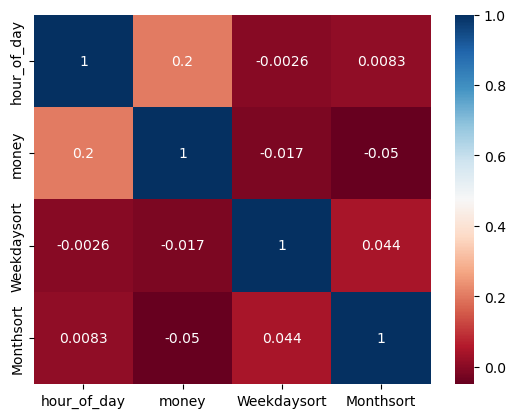

In [9]:
# Lets explore the correlation btw numerical columns
sns.heatmap(coffee.corr(numeric_only=True),annot=True,cmap='RdBu')
plt.show()

In [6]:
# Check for the duplicates columns
coffee.duplicated().sum()

np.int64(0)

# VISUAL ANALYSIS

In [11]:
# Separate num_cols and cat_cols
num_cols=coffee.select_dtypes(np.number).columns
cat_cols=coffee.select_dtypes(object).columns

In [12]:
num_cols

Index(['hour_of_day', 'money', 'Weekdaysort', 'Monthsort'], dtype='object')

In [13]:
cat_cols

Index(['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name',
       'Date', 'Time'],
      dtype='object')

# UNIVARIATE ANALYSIS

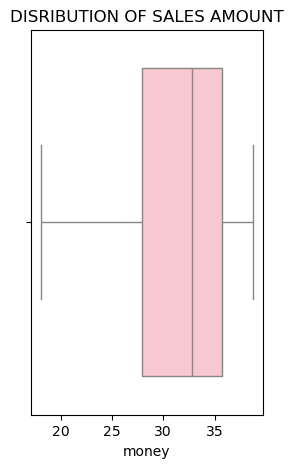

In [126]:
# What is the distribution of sales amount / money (histogram, boxplot)?
plt.figure(figsize=(3,5))
sns.boxplot(data=coffee,x='money',color='pink')
plt.title('DISRIBUTION OF SALES AMOUNT')
plt.show()

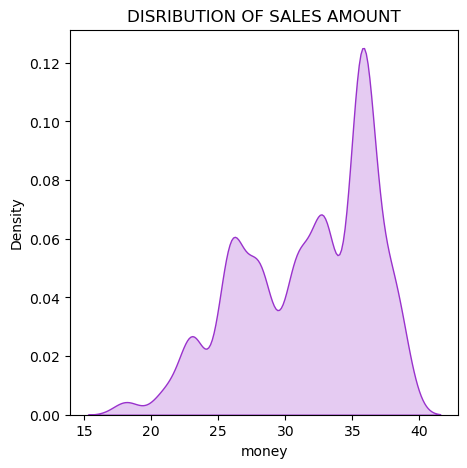

In [127]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=coffee,x='money',color='darkorchid',fill=True)
plt.title('DISRIBUTION OF SALES AMOUNT')
plt.show()

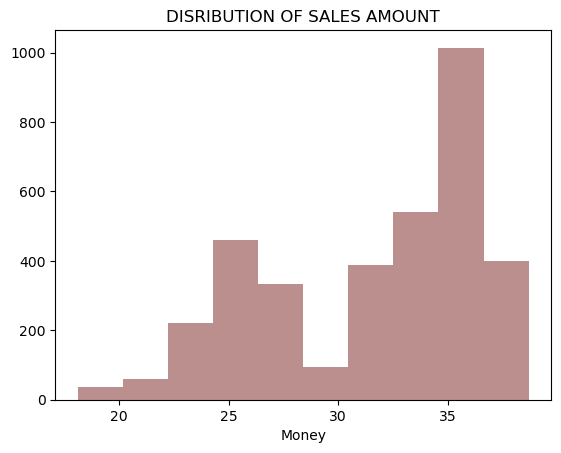

In [129]:
plt.hist(data=coffee,x='money',color='rosybrown')
plt.title('DISRIBUTION OF SALES AMOUNT')
plt.xlabel('Money')
plt.show()

**Infrence**
* First of all there are no outliers.
* Secondly the data is left skewed.
* Third the price mostly ranges from 25-40

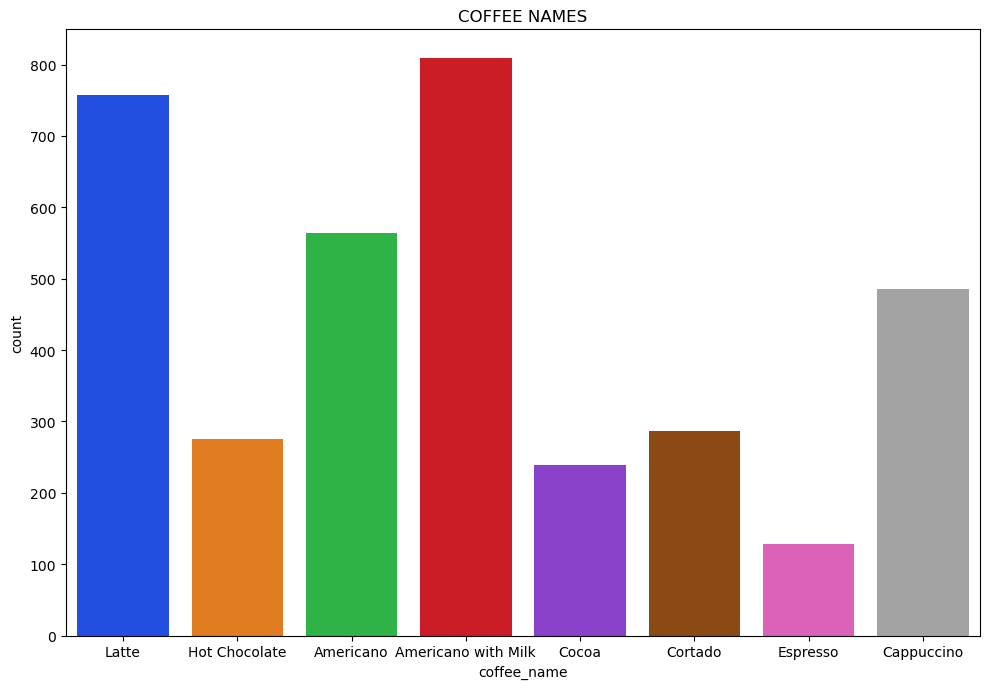

In [131]:
# How many unique coffee products (coffee types)?
plt.figure(figsize=(10,7))
sns.countplot(data=coffee,x='coffee_name',palette='bright')
plt.title('COFFEE NAMES')
plt.tight_layout()
plt.show()

**Infrence**
* So there are 8 types of coffee namely(Latte, Hot Chocolate ,Americano ,Americano with Milk , Cocoa, Cortado, Espresso and Cappuccino)
* The most frequent coffee sold is Americano with Milk while the least sold is Espresso.

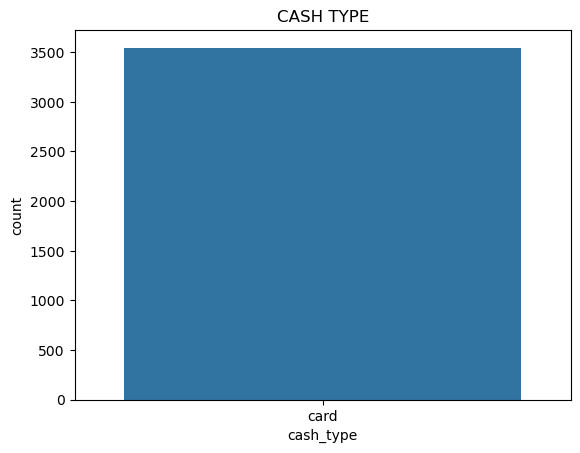

In [132]:
# What are the counts or proportions of payment types (e.g. cash vs card)?
sns.countplot(data=coffee,x='cash_type')
plt.title('CASH TYPE')
plt.show()

In [19]:
coffee['cash_type'].value_counts()

cash_type
card    3547
Name: count, dtype: int64

**Infrence**
* Here we can see that all payments are made in card only and not in cash.

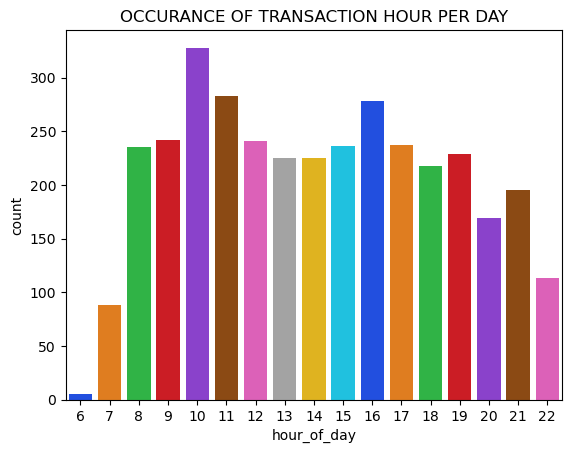

In [133]:
# How many transactions occur per day / per hour?
sns.countplot(data=coffee,x='hour_of_day',palette='bright')
plt.title('OCCURANCE OF TRANSACTION HOUR PER DAY')
plt.show()

**Infrence**
* At 10 o'clock am  most of the transactions has taken place.

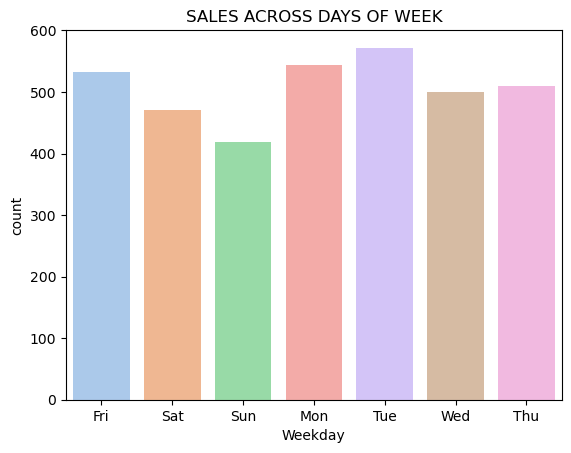

In [7]:
# How do sales vary across days of week (Monday–Sunday)?
sns.countplot(data=coffee,x='Weekday',palette='pastel')
plt.title('SALES ACROSS DAYS OF WEEK')
plt.show()

**Infrence**
* Most of the sales are happening on Tuesday where as the least sales is on Sunday's

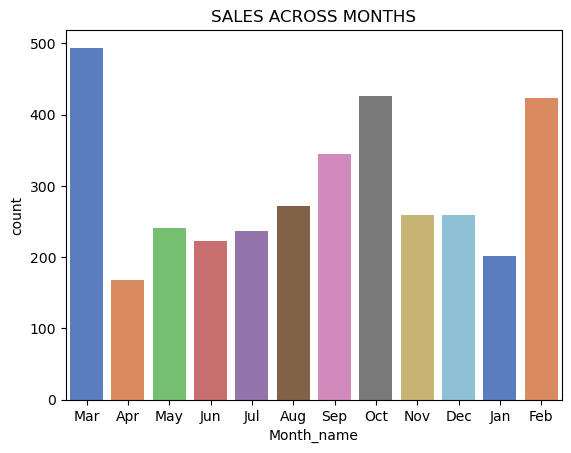

In [135]:
# How do sales vary by month?
sns.countplot(data=coffee,x='Month_name',palette='muted')
plt.title('SALES ACROSS MONTHS')
plt.show()

**Infrence**
* As we can see most of the sales is in month of March and yes sales vary a lot in month as we can see the minimum sales is in month April.

# BIVARIATE AND MULTIVARIATE ANALYSIS

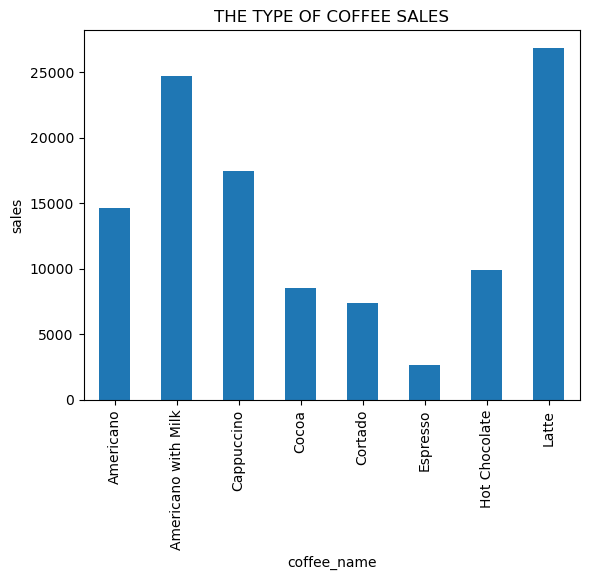

In [11]:
# How does coffee type relate to sales amount?
coffee.groupby(by='coffee_name')['money'].sum().plot(kind='bar')
plt.title('THE TYPE OF COFFEE SALES')
plt.ylabel('sales')
plt.show()

**Infrence**
* Latte has the maximum sales amount.

<Figure size 2000x2000 with 0 Axes>

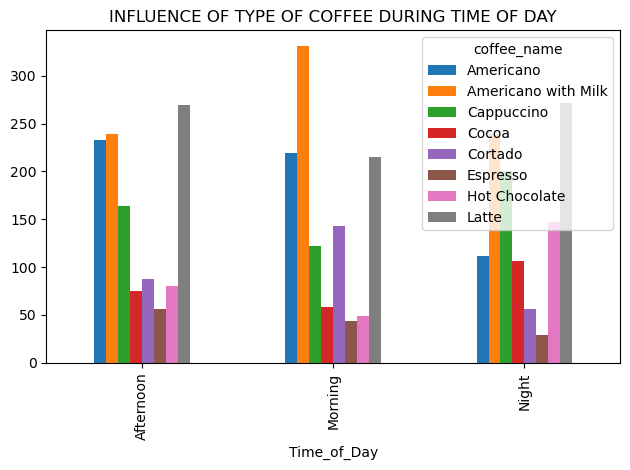

In [137]:
# Does time-of-day (hour) influence which coffee types are bought?
plt.figure(figsize=(20,20))
pd.crosstab(coffee['Time_of_Day'],coffee['coffee_name']).plot(kind='bar')
plt.title('INFLUENCE OF TYPE OF COFFEE DURING TIME OF DAY')
plt.tight_layout()
plt.show()

**Infrence**
* Yes time of day influence which coffee types are sold.
* During afternoon and night latte are mostly sold.
* During morning Americano with milk are mostly sold.

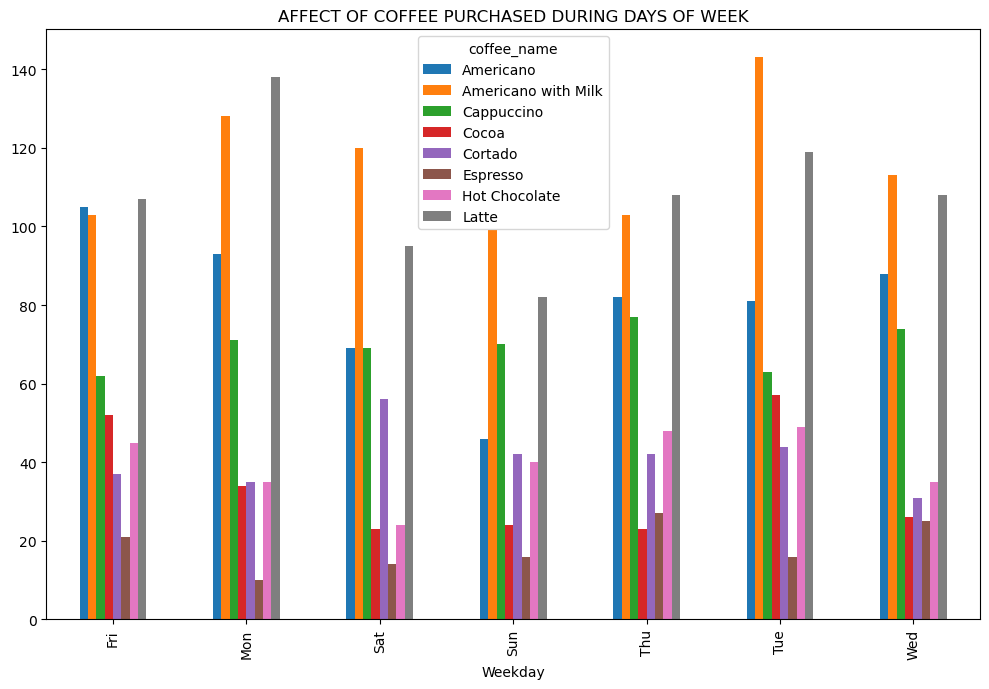

In [138]:
# How does day-of-week affect different coffee types?
pd.crosstab(coffee['Weekday'],coffee['coffee_name']).plot(kind='bar',figsize=(10,7))
plt.title('AFFECT OF COFFEE PURCHASED DURING DAYS OF WEEK')
plt.tight_layout()
plt.show()

**Infrence**
* As per the observation Latte is mostly sold on Friday,Monday,Thursady.
* While Americano with milk are mostly sold on Saturday,Sunday,Tuesday and Wednesday.
* While Esppreso are less sold on Friday,Monday,Saturday,Sunday,Tuesday and Wednesday except Thursday where Cocoa is least sold.

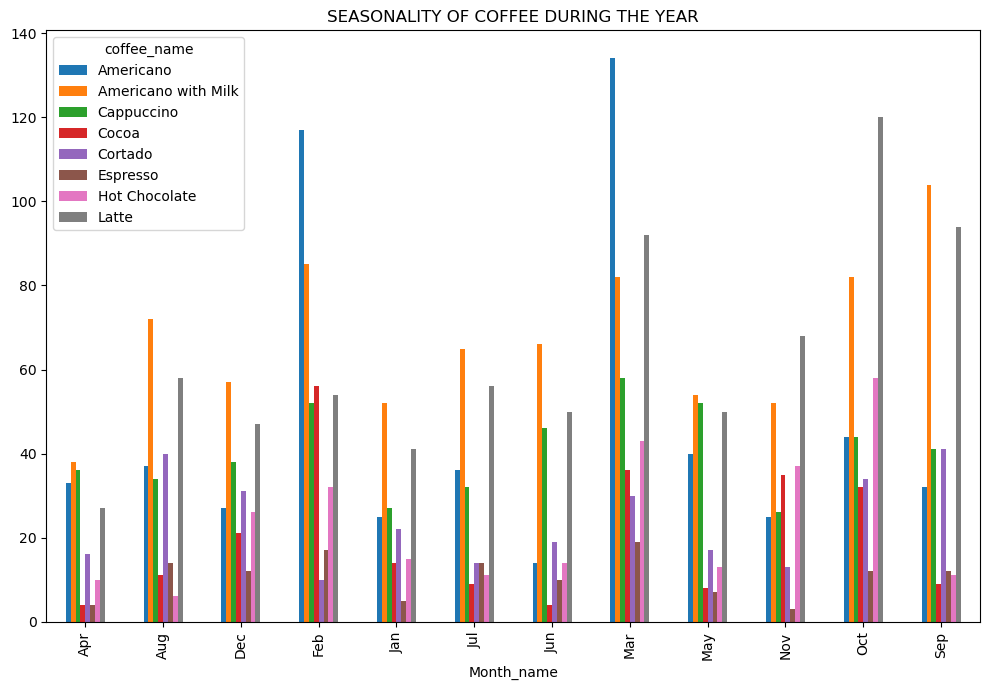

In [139]:
# Is there seasonality: do certain months see more sales of particular coffee types?
pd.crosstab(coffee['Month_name'],coffee['coffee_name']).plot(kind='bar',figsize=(10,7))
plt.title('SEASONALITY OF COFFEE DURING THE YEAR')
plt.tight_layout()
plt.show()

**Infrence**
* In the month of Feb and March Americano is sold the most whereas  all over the year Americano with Milk is sold.

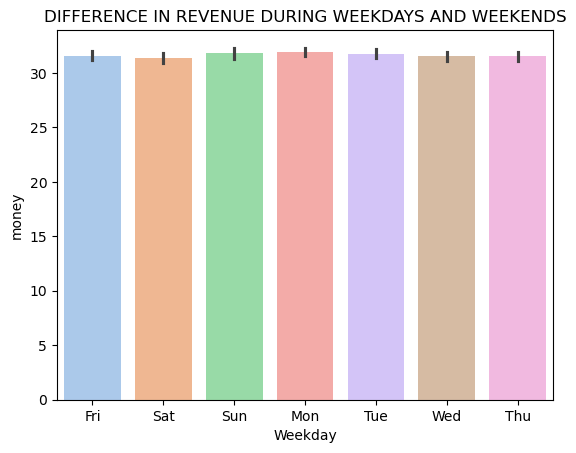

In [141]:
# Are there differences in revenue between weekdays vs weekends?
sns.barplot(data=coffee,x='Weekday',y='money',palette='pastel')
plt.title('DIFFERENCE IN REVENUE DURING WEEKDAYS AND WEEKENDS')
plt.show()

**Infrence**
* There is no difference in the revenues either on weekdays or weekends.

# TIME SERIES ANALYSIS

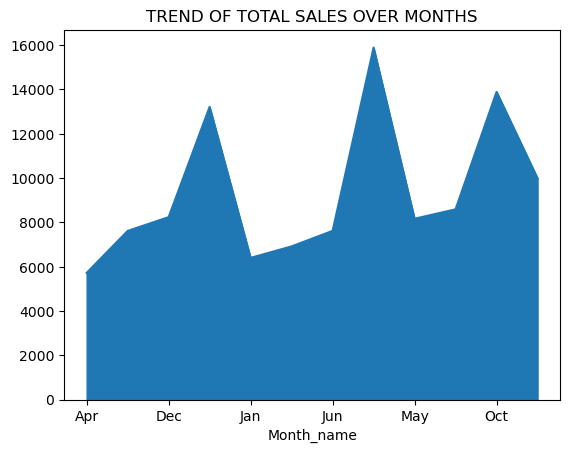

In [150]:
# What is the trend in total sales over time (e.g. day-by-day or month-by-month)?
coffee.groupby(by='Month_name')['money'].sum().plot(kind='area')
plt.title('TREND OF TOTAL SALES OVER MONTHS')
plt.show()

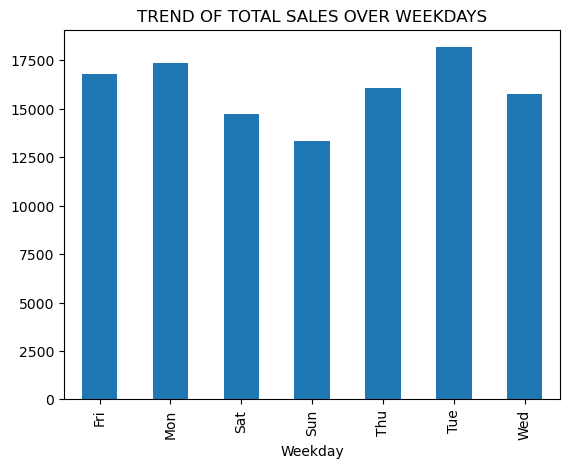

In [152]:
coffee.groupby(by='Weekday')['money'].sum().plot(kind='bar')
plt.title('TREND OF TOTAL SALES OVER WEEKDAYS')
plt.show()

**Infrence**
* Over the month of may to june the sales are high as compared to other months.
* While On Tuesday the sales are more as compared to weekends.

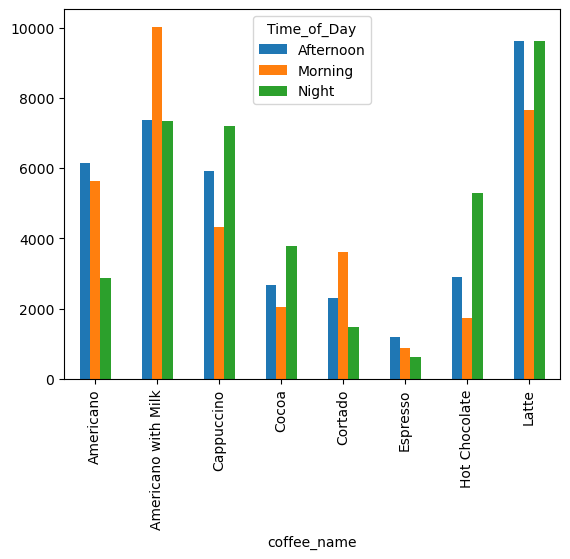

In [162]:
# Analysis of revenue generated based on coffee type and time of day.
pd.pivot_table(data=coffee,index='coffee_name',columns='Time_of_Day',values='money',aggfunc='sum').plot(kind='bar')
plt.show()

**Infrence**
* During morning Americano with milk has the higher revneue where as during Afternoon and Night Latte has the highest sales.

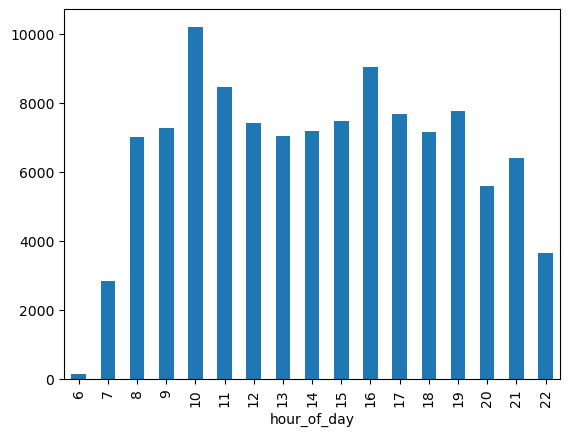

In [164]:
coffee.groupby(by='hour_of_day')['money'].sum().plot(kind='bar')
plt.show()

**Infrence**
* As per the observation made above the coffee which generates the most of the revneue is Latte whereas the coffee which has been demanded more is Americano with milk, from this we can say that though the demand for Americano with milk is high but revenue is slighlty low as there might be difference in the sales price of the products.
* We can see that the mode of payment are made in card and not in cash.
* The busiest hour is the 10th hour of the day and with the highest revenue.
* During Tuesday the revneue and the number of orders are high.
* As per the seasonality Americano are most sold during Feb and March and otherwise rest of the year Americano with Milk is sold.